Simple linear regression :


*   The objective of Linear Regression is to find a line that minimizes the prediction error of all the data points.



---



In [10]:
# local minima and global minima
# MSE, MAE - error handling
# performance metrices - r square, adjhusted r square
# polynomial

In [57]:
# Step 1: Import necessary libraries
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures

In [58]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [59]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
y = true_salaries + noise  # Final dependent variable with noise

In [60]:
# OLS
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [61]:
# step 3 : create linear regression model
model = LinearRegression()

In [62]:
# step 4 : train the model using the dataset
model.fit(x,y)

LinearRegression()

In [63]:
coefficient = model.coef_[0]
print(f"Coefficient: {coefficient}")

#calculate intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Coefficient: 4.965498141580592
Intercept: 27.430065779800533


In [64]:
# step 6 : display the equation of the line
print(f"Equation of the line : Y = {coefficient:.2f}x + {intercept :.2f}")

Equation of the line : Y = 4.97x + 27.43


In [65]:
# step 7 : Predict values using the model
Y_pred = model.predict(x)
Y_pred
# predict salaries for the given experience values

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

In [66]:
# model evaluation metrics - error checking
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)
rmse = np.sqrt(mse)

In [67]:
# mse disadvantages : line of best will change a lot compared to mae if there are any outliers, hence mae is used
mse

11.751853009895182

In [68]:
mae

2.868273465573678

In [69]:
rmse

3.428097578817613

In [70]:
# model accuracy using r square and adjusted r square
# disadvantag in r sq : will not check all dependent columns
r_square = r2_score(y, Y_pred)
r_square

0.9453822032109368

In [71]:
# adjusted r square
# no of obvs
n = len(y)
# no of independent variables
p =1
adj = 1 -((1-r_square)*(n-1)/(n-p-1))
adj

0.9385549786123039

In [72]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     54.01
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.56e-05
Time:                        06:38:44   Log-Likelihood:                -26.699
No. Observations:                  10   AIC:                             59.40
Df Residuals:                       7   BIC:                             60.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6856     

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


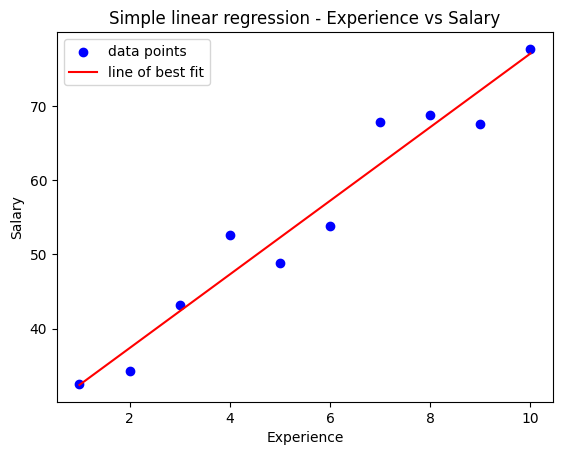

In [73]:
# visualization
plt.scatter(x,y, color = 'blue', label = 'data points')
# step 9 : plot the regression line
plt.plot(x,Y_pred, color = 'red', label = 'line of best fit')
# step 10: add labels and legend
plt.xlabel('Experience')
plt.ylabel('Salary')

plt.title('Simple linear regression - Experience vs Salary')
plt.legend()
plt.show()

In [ ]:
# predicting feature
while True:
  try:
    exp = float(input("\n Enter years of experience to predict salary (or -1 to exit): "))
    if exp == -1:
      break
    predicted_salary = model.predict(np.array([[exp]]))[0]
    print(f"Predicted salary for {exp} years of experience : ${predicted_salary:.2f}K")
  except ValueError:
    print("Please enter a valid number")

Predicted salary for 10.0 years of experience : $77.09K

 Enter years of experience to predict salary (or -1 to exit): 10
Predicted salary for 10.0 years of experience : $77.09K


# Step 1: Import necessary libraries
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
# Step 3: Creating a Linear Regression Model
# Step 4: Training the model using data set
# Step 5: Get the values of slope and intercept from the trained model
# Step 6: Display the equation of the line
# Step 7: Predit values using the model
# Step 8: Plot the regression line
# step 9: Prediction Features
